<a href="https://colab.research.google.com/github/cmannnn/workhuman_data_analytic_canidate_exercise/blob/main/workhuman_data_analytic_canidate_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Key Fields**

*   visitId – this is the unique random identifier assigned by Google to each visit
*   fullVisitorId – this is the unique random identifier assigned by Google to each distinct user
*   hits.type – denotes the category of the hit (pageview, event, transaction, etc)
*   hits.page.pagePath – the URL pathname of the page where the hit occurred
hits.eventInfo. (columns AQ-AS) – this is the custom taxonomy for non-pageload interactions
*   trafficsource. (columns J-N) – these are UTM attributes about the referrer of the visit
*   device. (columns O-R) – these are technology attributes about the user
geoNetwork. (columns S-V) – these are location attributes about the user








# **Business KPIs**


*   Prospect conversion rate – the percent of first-time visitors with a transaction, excluding any returning customers
*   Channel revenue contribution – how much revenue is attributed to each acquisition channel
*   Gross margin – the percent of all e-commerce revenue – cost of goods sold out of total revenue








# **Business Questions**

*   What is the best way to segment Google organic search traffic, and why?
*   Which entry page(s) would be a good place to focus on optimizing and why?
*   What is the best way to measure how many transactions were completed and conversion rate, and why?
*   Which continent has the highest add-to-cart rate on mobile?
*   Given the above business KPIs, please provide 3 suggestions for additional data to be captured in Google Analytics to make this dataset more useful.

#Imports

In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!python'/content/drive/MyDrive/Colabby Krabby Paddy/workhuman_data_analytic_canidate_exercise/setup.py' install

/bin/bash: python/content/drive/MyDrive/Colabby Krabby Paddy/workhuman_data_analytic_canidate_exercise/setup.py: No such file or directory


In [3]:
# imports
#!pip install pandas==3.0.0
import pandas as pd
#!pip install --upgrade openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [4]:
path = '/content/drive/MyDrive/Colabby Krabby Paddy/workhuman_data_analytic_canidate_exercise/da_google_analytics_sample.xlsx'

In [5]:
df = pd.read_excel(path, index_col = 'fullVisitorID')

In [6]:
cols_to_drop = ['trafficSource.campaignCode', 'hits.transaction.transactionCoupon', 'hits.eventInfo.eventValue', 'userId']
df.drop(cols_to_drop, axis = 1, inplace = True)

In [7]:
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')

# Current

In [8]:
df_grouped = df.groupby(df.index).sum()

In [9]:
df.head(3)

,visitNumber,visitId,visitStartTime,date,totals.visits,totals.hits,totals.pageviews,totals.timeOnSite,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.ountry,geoNetwork.networkDomain,hits.hitNumber,hits.time,hits.hour,hits.minute,hits.isInteraction,hits.isEntrance,hits.isExit,hits.referer,hits.page.pagePath,hits.page.hostname,hits.page.pageTitle,hits.page.pagePathLevel1,hits.page.pagePathLevel2,hits.page.pagePathLevel3,hits.page.pagePathLevel4,hits.transaction.transactionId,hits.transaction.transactionRevenue,hits.transaction.transactionTax,hits.transaction.transactionShipping,hits.eventInfo.eventCategory,hits.eventInfo.eventAction,hits.eventInfo.eventLabel,hits.eCommerceAction.action_type,hits.eCommerceAction.step,hits.eCommerceAction.option,hits.type,hits.latencyTracking.pageLoadSample,hits.latencyTracking.pageLoadTime,hits.latencyTracking.pageDownloadTime,channelGrouping
fullVisitorID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8.467980e+18,1,1489544305,1489544305,2017-03-14,1,1,1.0,NaN,1.0,(not set),google,organic,(not provided),Chrome,Windows,False,desktop,Oceania,Australasia,Australia,bigpond.net.au,1,0,19,18,True,1.0,1.0,https://www.google.com.au/,/home,www.googlemerchandisestore.com,Google Online Store,/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
1.061800e+18,1,1489496466,1489496466,2017-03-14,1,1,1.0,NaN,1.0,(not set),google,organic,(not provided),Chrome,Windows,False,desktop,Europe,Western Europe,France,eurorscg.fr,1,0,6,1,True,1.0,1.0,https://www.google.fr/,/home,www.googlemerchandisestore.com,Google Online Store,/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
2.833520e+18,1,1489517319,1489517319,2017-03-14,1,1,1.0,NaN,1.0,(not set),bing,organic,google merchandise,Internet Explorer,Windows,True,mobile,Asia,Western Asia,Israel,sfr.net,1,0,11,48,True,1.0,1.0,http://www.bing.com/search?q=google+merchandis...,/home,www.googlemerchandisestore.com,Google Online Store,/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Organic Search


In [10]:
df['device.deviceCategory'].value_counts()

desktop    7753
mobile     1784
tablet      183
Name: device.deviceCategory, dtype: int64

In [11]:
df['device.browser'].value_counts()

Chrome                      7590
Safari                       950
Firefox                      440
Edge                         300
Internet Explorer            153
Android Webview              128
Opera Mini                    78
Safari (in-app)               47
UC Browser                    13
Opera                          8
YaBrowser                      4
Amazon Silk                    3
Android Browser                2
Coc Coc                        2
Nokia Browser                  1
Mozilla Compatible Agent       1
Name: device.browser, dtype: int64

[]

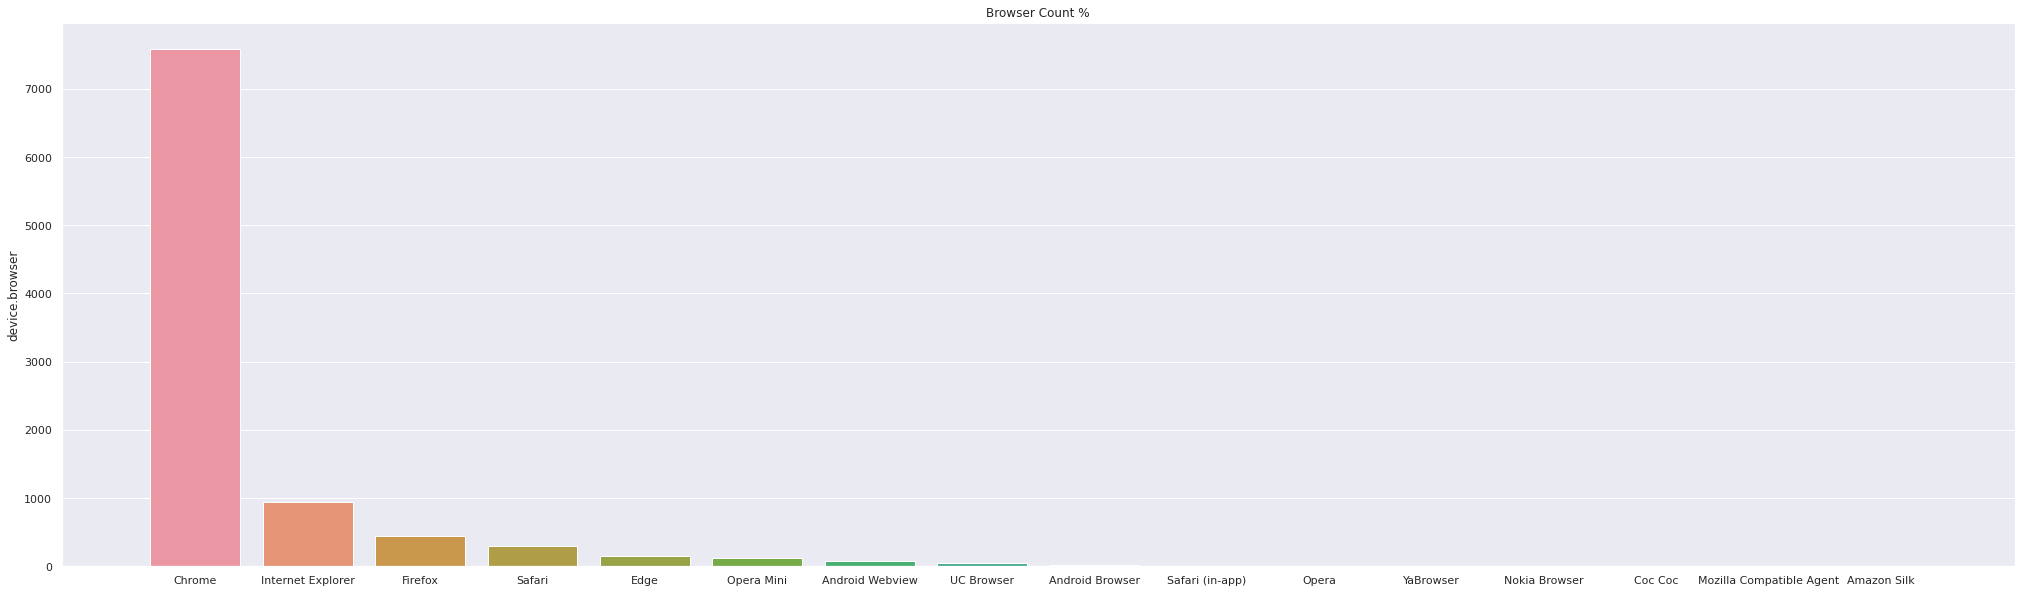

In [12]:
# browser count
ax, fig = plt.subplots(figsize = (35,10))
ax = sns.barplot(x = df['device.browser'].unique(), y = df['device.browser'].value_counts())
plt.title('Browser Count %')
plt.plot()

In [13]:
df['device.deviceCategory'].value_counts()

desktop    7753
mobile     1784
tablet      183
Name: device.deviceCategory, dtype: int64

[]

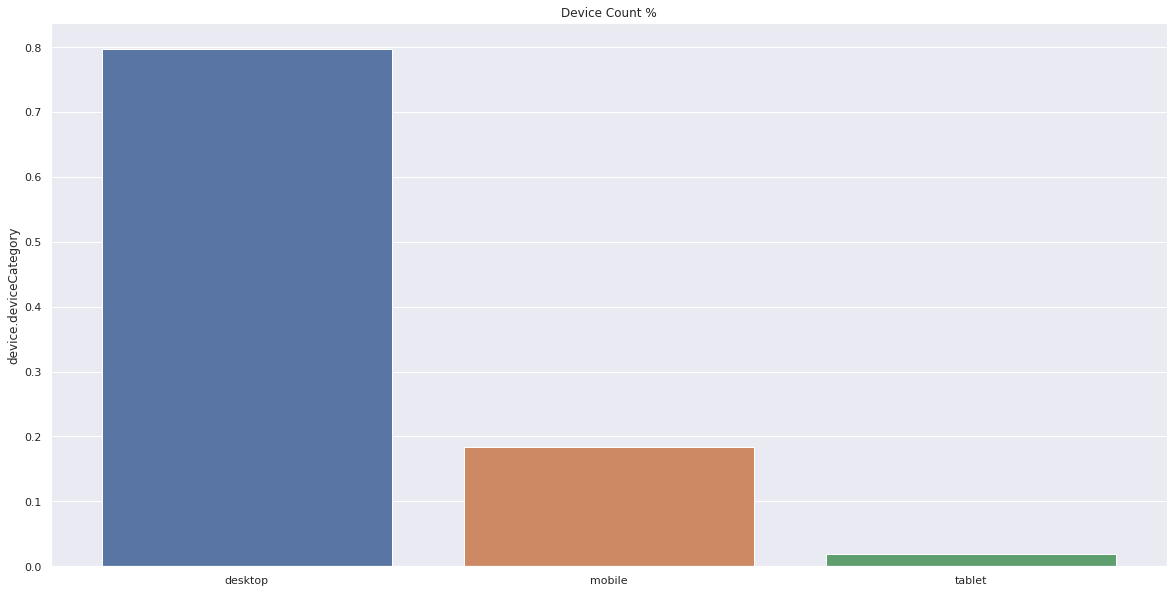

In [14]:
#device.deviceCategory	
ax, fig = plt.subplots(figsize = (20,10))
sns.barplot(x = df['device.deviceCategory'].unique(), y = df['device.deviceCategory'].value_counts() / df['device.deviceCategory'].value_counts().sum())
plt.title('Device Count %')
plt.plot()

In [15]:
df['channelGrouping'].value_counts()

Organic Search    5013
Referral          1932
Direct            1421
Social             938
Paid Search        217
Affiliates         127
Display             72
Name: channelGrouping, dtype: int64

In [16]:
df['device.isMobile'].value_counts()

False    7753
True     1967
Name: device.isMobile, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

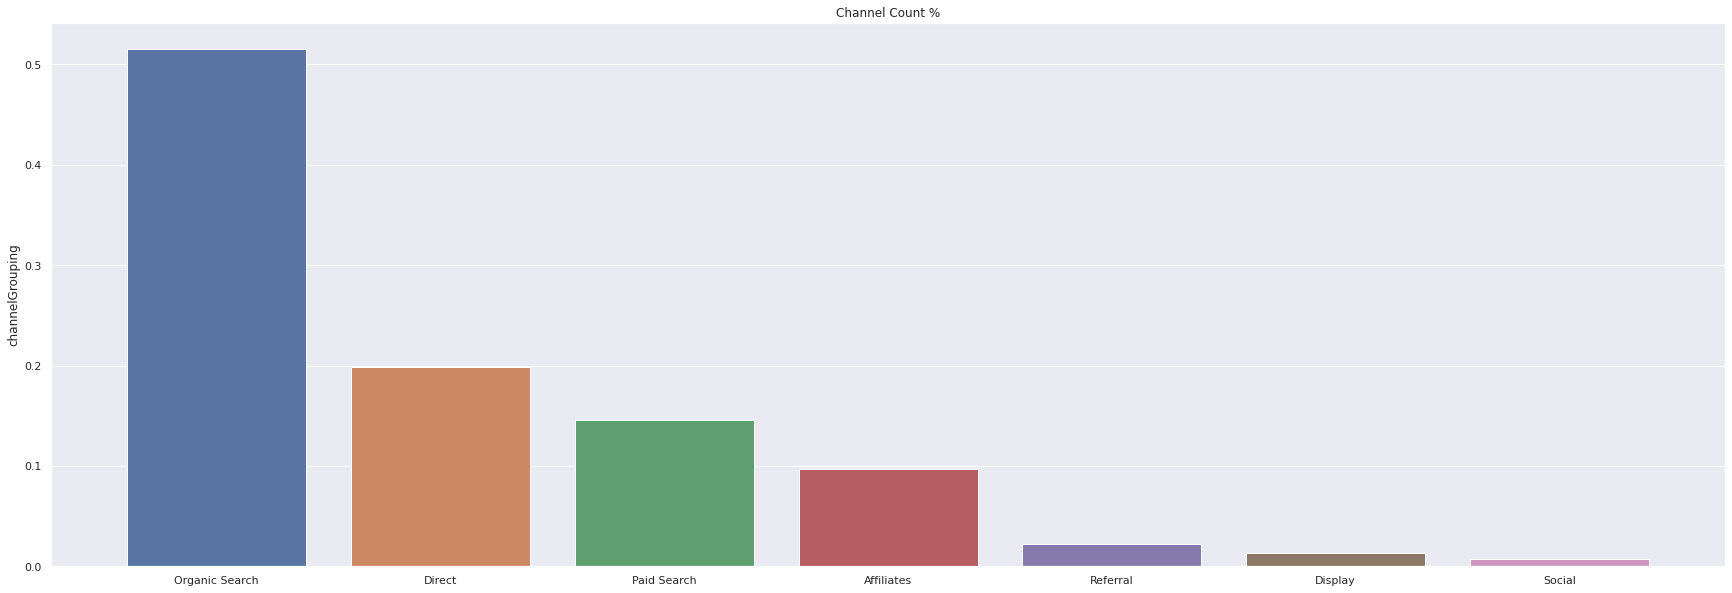

In [17]:
ax, fig = plt.subplots(figsize = (30,10))
sns.barplot(df['channelGrouping'].unique(), df['channelGrouping'].value_counts() / df['channelGrouping'].value_counts().sum())
plt.title('Channel Count %')
plt.plot()

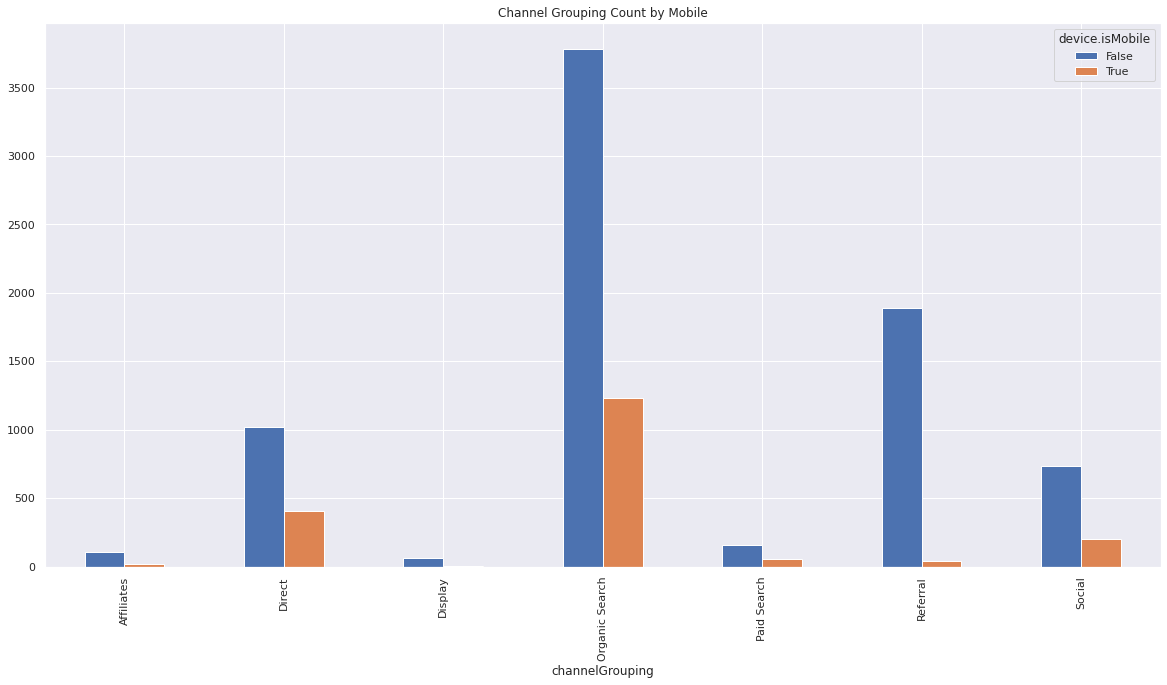

In [18]:
channel_mobile_group = df.groupby(['channelGrouping', 'device.isMobile'])
channel_mobile_group_count = channel_mobile_group['channelGrouping'].count()
channel_mobile_group_count.unstack().plot.bar(figsize = (20, 10), title = 'Channel Grouping Count by Mobile')

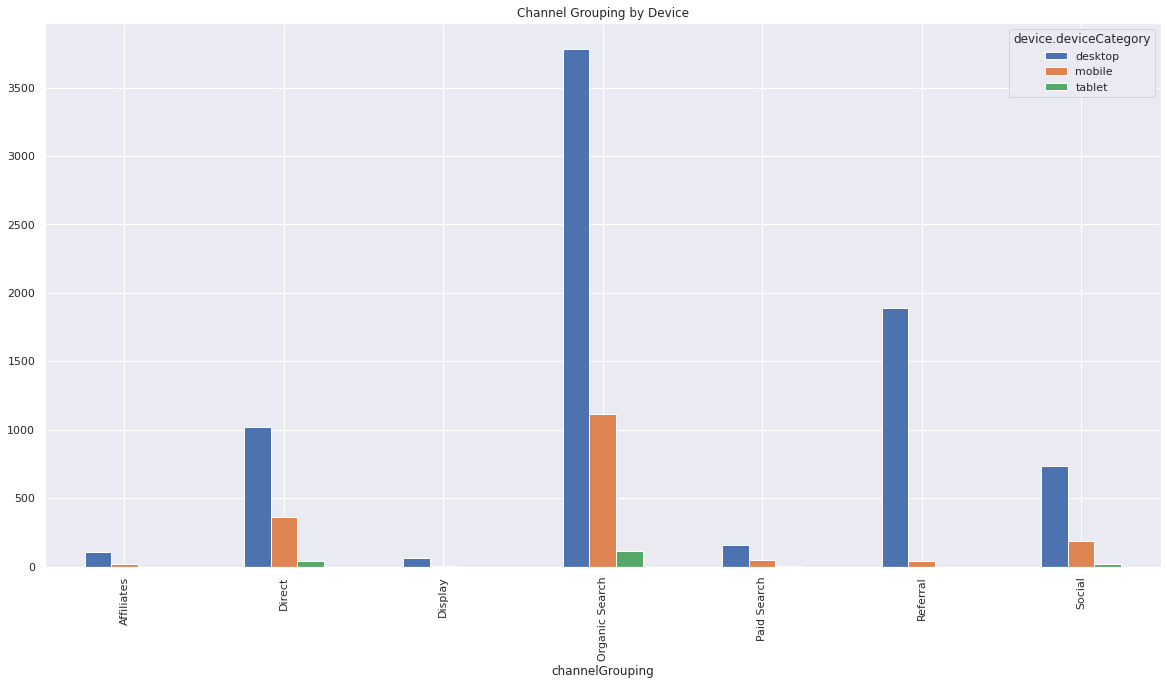

In [19]:
#df['device.deviceCategory'].value_counts()
device_category_mobile_group = df.groupby(['channelGrouping', 'device.deviceCategory'])
device_category_mobile_group_count = device_category_mobile_group['channelGrouping'].count()
device_category_mobile_group_count.unstack().plot.bar(figsize = (20, 10), title = 'Channel Grouping by Device')

In [20]:
df['hits.type'].value_counts()

PAGE     8550
EVENT    1170
Name: hits.type, dtype: int64

In [21]:
#df['hits.transaction.transactionRevenue'].value_counts()

In [22]:
df.describe()

,visitNumber,visitId,visitStartTime,totals.visits,totals.hits,totals.pageviews,totals.timeOnSite,totals.newVisits,hits.hitNumber,hits.time,hits.hour,hits.minute,hits.isEntrance,hits.isExit,hits.transaction.transactionRevenue,hits.transaction.transactionTax,hits.transaction.transactionShipping,hits.eCommerceAction.action_type,hits.eCommerceAction.step,hits.latencyTracking.pageLoadSample,hits.latencyTracking.pageLoadTime,hits.latencyTracking.pageDownloadTime
count,9720.000000,9.720000e+03,9.720000e+03,9720.0,9720.000000,9718.000000,8533.000000,6746.0,9720.000000,9.720000e+03,9720.000000,9720.000000,2337.0,2337.0,4.000000e+01,3.200000e+01,4.000000e+01,9720.000000,9720.000000,95.0,95.000000,95.000000
mean,2.554218,1.489520e+09,1.489520e+09,1.0,21.861934,17.791727,853.666237,1.0,11.446399,4.066472e+05,12.038374,29.548765,1.0,1.0,9.800775e+07,1.435594e+07,1.478125e+07,0.504733,1.028807,1.0,11470.368421,684.947368
std,8.921266,2.279635e+04,2.279499e+04,0.0,38.012443,31.022326,1854.433413,0.0,22.831471,1.215049e+06,6.331991,17.318717,0.0,0.0,9.170047e+07,9.682333e+06,9.080651e+06,1.195207,0.213240,0.0,40755.534447,4788.293425
min,1.000000,1.489473e+09,1.489475e+09,1.0,1.000000,1.000000,2.000000,1.0,1.000000,0.000000e+00,0.000000,0.000000,1.0,1.0,5.590000e+06,2.970000e+06,7.500000e+06,0.000000,1.000000,1.0,1194.000000,1.000000
25%,1.000000,1.489504e+09,1.489504e+09,1.0,3.000000,3.000000,105.000000,1.0,2.000000,3.724500e+03,8.000000,15.000000,1.0,1.0,2.398750e+07,7.872500e+06,1.050000e+07,0.000000,1.000000,1.0,2616.500000,57.500000
50%,1.000000,1.489520e+09,1.489520e+09,1.0,10.000000,9.000000,316.000000,1.0,4.000000,7.619000e+04,12.000000,29.000000,1.0,1.0,9.024000e+07,1.288000e+07,1.150000e+07,0.000000,1.000000,1.0,3535.000000,119.000000
75%,2.000000,1.489536e+09,1.489536e+09,1.0,23.000000,18.000000,758.000000,1.0,11.000000,2.914350e+05,17.000000,45.000000,1.0,1.0,1.258500e+08,1.707250e+07,1.450000e+07,0.000000,1.000000,1.0,6270.000000,156.000000
max,265.000000,1.489561e+09,1.489561e+09,1.0,205.000000,179.000000,12136.000000,1.0,205.000000,1.213579e+07,23.000000,59.000000,1.0,1.0,4.877000e+08,5.162000e+07,5.573000e+07,6.000000,3.000000,1.0,381337.000000,46713.000000


#1. What is the best way to segment Google organic search traffic, and why?

In [23]:
df['channelGrouping'].value_counts()

Organic Search    5013
Referral          1932
Direct            1421
Social             938
Paid Search        217
Affiliates         127
Display             72
Name: channelGrouping, dtype: int64

In [24]:
df['trafficSource.source'].value_counts()

google                     5119
(direct)                   2891
youtube.com                 623
l.facebook.com              230
analytics.google.com        170
Partners                    127
google.com                  111
dfa                          72
bing                         68
mail.google.com              43
sites.google.com             36
siliconvalley.about.com      35
sashihara.jp                 31
yahoo                        24
m.facebook.com               22
reddit.com                   21
t.co                         18
baidu                        13
groups.google.com            10
qiita.com                     8
facebook.com                  8
docs.google.com               8
blog.golang.org               7
quora.com                     6
ask                           6
businessinsider.com           5
google.nl                     2
google.co.jp                  2
web.skype.com                 1
google.co.uk                  1
google.co.th                  1
blognone

In [25]:
# channelgrouping = 'organic search' & traffic source = 'google'
google_organic_traffic = df[(df['channelGrouping'] == 'Organic Search') & (df['trafficSource.source'] == 'google')]

In [26]:
google_organic_traffic.tail(5)

,visitNumber,visitId,visitStartTime,date,totals.visits,totals.hits,totals.pageviews,totals.timeOnSite,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.ountry,geoNetwork.networkDomain,hits.hitNumber,hits.time,hits.hour,hits.minute,hits.isInteraction,hits.isEntrance,hits.isExit,hits.referer,hits.page.pagePath,hits.page.hostname,hits.page.pageTitle,hits.page.pagePathLevel1,hits.page.pagePathLevel2,hits.page.pagePathLevel3,hits.page.pagePathLevel4,hits.transaction.transactionId,hits.transaction.transactionRevenue,hits.transaction.transactionTax,hits.transaction.transactionShipping,hits.eventInfo.eventCategory,hits.eventInfo.eventAction,hits.eventInfo.eventLabel,hits.eCommerceAction.action_type,hits.eCommerceAction.step,hits.eCommerceAction.option,hits.type,hits.latencyTracking.pageLoadSample,hits.latencyTracking.pageLoadTime,hits.latencyTracking.pageDownloadTime,channelGrouping
fullVisitorID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6.957250e+18,1,1489503889,1489503889,2017-03-14,1,179,132.0,12136.0,1.0,(not set),google,organic,(not provided),Edge,Windows,False,desktop,Americas,Northern America,United States,(not set),175,11830386,11,22,True,NaN,NaN,NaN,/basket.html,shop.googlemerchandisestore.com,Shopping Cart,/basket.html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
6.957250e+18,1,1489503889,1489503889,2017-03-14,1,179,132.0,12136.0,1.0,(not set),google,organic,(not provided),Edge,Windows,False,desktop,Americas,Northern America,United States,(not set),176,11837669,11,22,True,NaN,NaN,NaN,/yourinfo.html,shop.googlemerchandisestore.com,Checkout Your Information,/yourinfo.html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,Billing and Shipping,PAGE,NaN,NaN,NaN,Organic Search
6.957250e+18,1,1489503889,1489503889,2017-03-14,1,179,132.0,12136.0,1.0,(not set),google,organic,(not provided),Edge,Windows,False,desktop,Americas,Northern America,United States,(not set),177,11953672,11,24,True,NaN,NaN,NaN,/payment.html,shop.googlemerchandisestore.com,Payment Method,/payment.html,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2,Payment,PAGE,NaN,NaN,NaN,Organic Search
6.957250e+18,1,1489503889,1489503889,2017-03-14,1,179,132.0,12136.0,1.0,(not set),google,organic,(not provided),Edge,Windows,False,desktop,Americas,Northern America,United States,(not set),178,12135773,11,27,True,NaN,NaN,NaN,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,/ordercompleted.html,NaN,NaN,NaN,ORD201703142188,96950000.0,NaN,10500000.0,NaN,NaN,NaN,6,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
6.957250e+18,1,1489503889,1489503889,2017-03-14,1,179,132.0,12136.0,1.0,(not set),google,organic,(not provided),Edge,Windows,False,desktop,Americas,Northern America,United States,(not set),179,12135786,11,27,True,NaN,1.0,NaN,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,/ordercompleted.html,NaN,NaN,NaN,ORD201703142188,NaN,NaN,NaN,NaN,NaN,NaN,6,1,NaN,PAGE,NaN,NaN,NaN,Organic Search


In [27]:
#channel_mobile_group = df.groupby(['channelGrouping', 'device.isMobile'])
#channel_mobile_group_count = channel_mobile_group['channelGrouping'].count()
#channel_mobile_group_count.unstack().plot.bar(figsize = (20, 10), title = 'Channel Grouping Count by Mobile')
google_organic_traffic_by_continent = google_organic_traffic.groupby(['geoNetwork.continent']).count()
#print(google_organic_traffic_by_continent)

google_organic_traffic_by_subContinent = google_organic_traffic.groupby(['geoNetwork.subContinent']).count()
#print(google_organic_traffic_by_subContinent)

google_organic_traffic_by_country = google_organic_traffic.groupby(['geoNetwork.ountry']).count()
print(google_organic_traffic_by_country)

                      visitNumber  ...  channelGrouping
geoNetwork.ountry                  ...                 
(not set)                       9  ...                9
Albania                         2  ...                2
Argentina                      10  ...               10
Australia                      31  ...               31
Austria                         3  ...                3
...                           ...  ...              ...
United Arab Emirates            2  ...                2
United Kingdom                190  ...              190
United States                2660  ...             2660
Venezuela                       8  ...                8
Vietnam                        10  ...               10

[70 rows x 50 columns]


The best way to segment the Google organic search traffic is by country. Segmenting by country allows for the most specific geographic targeting from the available data. SEO must be adapted for different countries due to the difference in language, culture, religion, region, etc. Geographic considerations must be taken into account when optimizing SEO.  

Country specific segmentation can also uncover the origin of hits, visits, and/or pageviews that can be focused on in an upcoming campaign, for example.

#2. Which entry page(s) would be a good place to focus on optimizing and why?

In [28]:
# many different entry pages containing 'google'
# could join to see total 'google' hits
df['trafficSource.source'][df['trafficSource.source'].str.contains('google')].value_counts()

google                  5119
analytics.google.com     170
google.com               111
mail.google.com           43
sites.google.com          36
groups.google.com         10
docs.google.com            8
google.co.jp               2
google.nl                  2
google.co.th               1
google.co.uk               1
Name: trafficSource.source, dtype: int64

In [29]:
# top 7 traffic sources
df['trafficSource.source'].value_counts().iloc[:7]

google                  5119
(direct)                2891
youtube.com              623
l.facebook.com           230
analytics.google.com     170
Partners                 127
google.com               111
Name: trafficSource.source, dtype: int64

In [30]:
# percentage of top 7 traffic sources
df['trafficSource.source'].value_counts().iloc[:7] / df['trafficSource.source'].value_counts().iloc[:7].sum() * 100

google                  55.215187
(direct)                31.183260
youtube.com              6.719879
l.facebook.com           2.480854
analytics.google.com     1.833675
Partners                 1.369863
google.com               1.197282
Name: trafficSource.source, dtype: float64

[]

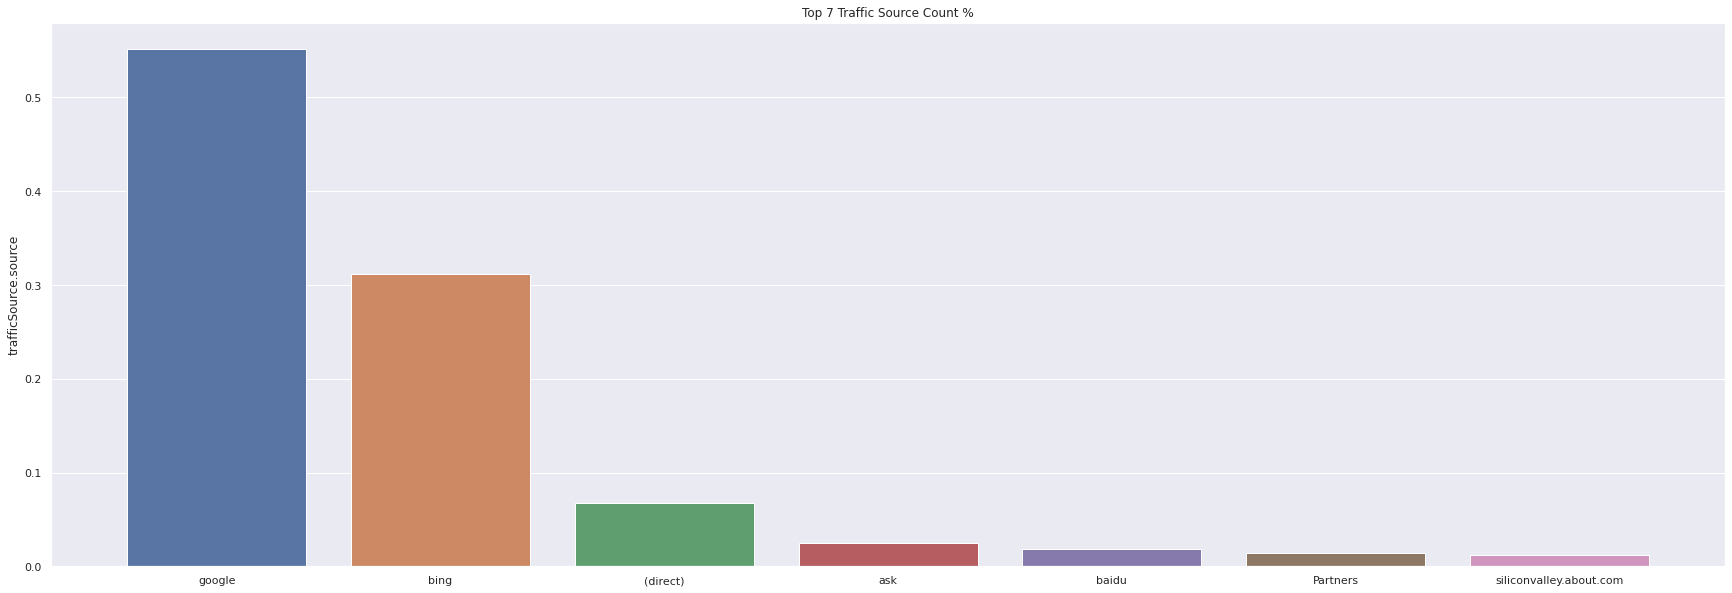

In [31]:
#device.deviceCategory	
ax, fig = plt.subplots(figsize = (30,10))
sns.barplot(x = df['trafficSource.source'].unique()[:7], y = df['trafficSource.source'].value_counts().iloc[:7] / df['trafficSource.source'].value_counts().iloc[:7].sum())
plt.title('Top 7 Traffic Source Count %')
plt.plot()

The most important entry pages to optimize would be the top 7 'sources' of where the users are coming from. I used this information found in the **['trafficSource.source']** column. The ['trafficSource.source'] column is the name of the search engine, the hostname, or the utm_source (advertiser, site, publication, etc) where traffic is coming from. These are non-unique users.

From the table or graph, you can see that Google is an extremely important source of traffic which accounts for the majority and more than 55% of all traffic. Optimizing Google search tearms for this website is vital. 

Users coming directly to the site is also very important to consider, where more than 31%. This indicates that many people know or are familiar with this site. There is a large dropoff after the top two entry pages. The remaining five entry pages account for about 13.58% of non-unique traffic. These five are important to optimize, but shouldn't take presedence over Google or direct search optimizing strategies. 

# 3. What is the best way to measure how many transactions were completed and conversion rate, and why?

In [32]:
df.head(2)

,visitNumber,visitId,visitStartTime,date,totals.visits,totals.hits,totals.pageviews,totals.timeOnSite,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.ountry,geoNetwork.networkDomain,hits.hitNumber,hits.time,hits.hour,hits.minute,hits.isInteraction,hits.isEntrance,hits.isExit,hits.referer,hits.page.pagePath,hits.page.hostname,hits.page.pageTitle,hits.page.pagePathLevel1,hits.page.pagePathLevel2,hits.page.pagePathLevel3,hits.page.pagePathLevel4,hits.transaction.transactionId,hits.transaction.transactionRevenue,hits.transaction.transactionTax,hits.transaction.transactionShipping,hits.eventInfo.eventCategory,hits.eventInfo.eventAction,hits.eventInfo.eventLabel,hits.eCommerceAction.action_type,hits.eCommerceAction.step,hits.eCommerceAction.option,hits.type,hits.latencyTracking.pageLoadSample,hits.latencyTracking.pageLoadTime,hits.latencyTracking.pageDownloadTime,channelGrouping
fullVisitorID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8.467980e+18,1,1489544305,1489544305,2017-03-14,1,1,1.0,NaN,1.0,(not set),google,organic,(not provided),Chrome,Windows,False,desktop,Oceania,Australasia,Australia,bigpond.net.au,1,0,19,18,True,1.0,1.0,https://www.google.com.au/,/home,www.googlemerchandisestore.com,Google Online Store,/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
1.061800e+18,1,1489496466,1489496466,2017-03-14,1,1,1.0,NaN,1.0,(not set),google,organic,(not provided),Chrome,Windows,False,desktop,Europe,Western Europe,France,eurorscg.fr,1,0,6,1,True,1.0,1.0,https://www.google.fr/,/home,www.googlemerchandisestore.com,Google Online Store,/home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,NaN,PAGE,NaN,NaN,NaN,Organic Search


In [52]:
df[df['hits.transaction.transactionRevenue'].notnull()]

,visitNumber,visitId,visitStartTime,date,totals.visits,totals.hits,totals.pageviews,totals.timeOnSite,totals.newVisits,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.ountry,geoNetwork.networkDomain,hits.hitNumber,hits.time,hits.hour,hits.minute,hits.isInteraction,hits.isEntrance,hits.isExit,hits.referer,hits.page.pagePath,hits.page.hostname,hits.page.pageTitle,hits.page.pagePathLevel1,hits.page.pagePathLevel2,hits.page.pagePathLevel3,hits.page.pagePathLevel4,hits.transaction.transactionId,hits.transaction.transactionRevenue,hits.transaction.transactionTax,hits.transaction.transactionShipping,hits.eventInfo.eventCategory,hits.eventInfo.eventAction,hits.eventInfo.eventLabel,hits.eCommerceAction.action_type,hits.eCommerceAction.step,hits.eCommerceAction.option,hits.type,hits.latencyTracking.pageLoadSample,hits.latencyTracking.pageLoadTime,hits.latencyTracking.pageDownloadTime,channelGrouping
fullVisitorID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7.328090e+18,4,1489477049,1489477049,2017-03-14,1,9,9.0,156.0,NaN,(not set),google,organic,(not provided),Safari,iOS,True,mobile,Americas,Northern America,United States,(not set),8,156434,0,40,True,NaN,NaN,NaN,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,/ordercompleted.html,NaN,NaN,NaN,ORD201703141827,23990000.0,7340000.0,23360000.0,NaN,NaN,NaN,6,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
3.041140e+18,3,1489529549,1489529549,2017-03-14,1,13,12.0,176.0,NaN,(not set),(direct),(none),NaN,Chrome,Windows,False,desktop,Americas,Northern America,United States,(not set),12,176132,15,15,True,NaN,NaN,NaN,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,/ordercompleted.html,NaN,NaN,NaN,ORD201703141957,20990000.0,6920000.0,11500000.0,NaN,NaN,NaN,6,1,NaN,PAGE,NaN,NaN,NaN,Referral
5.107270e+18,3,1489553537,1489553537,2017-03-14,1,15,15.0,809.0,NaN,(not set),(direct),(none),NaN,Chrome,Chrome OS,False,desktop,Americas,Northern America,United States,comcast.net,14,809377,22,5,True,NaN,NaN,NaN,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,/ordercompleted.html,NaN,NaN,NaN,ORD201703142000,44990000.0,7120000.0,9500000.0,NaN,NaN,NaN,6,1,NaN,PAGE,NaN,NaN,NaN,Referral
7.652120e+18,1,1489526631,1489526631,2017-03-14,1,16,13.0,373.0,1.0,(not set),google,organic,(not provided),Chrome,Macintosh,False,desktop,Americas,Northern America,United States,mesa.az.us,15,372581,14,30,True,NaN,NaN,NaN,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,/ordercompleted.html,NaN,NaN,NaN,ORD201703142013,245860000.0,31470000.0,34430000.0,NaN,NaN,NaN,6,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
2.127440e+18,2,1489487937,1489487937,2017-03-14,1,17,15.0,466.0,NaN,(not set),yahoo,organic,(not provided),Safari,Macintosh,False,desktop,Americas,Northern America,United States,verizon.net,16,465613,3,46,True,NaN,NaN,NaN,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,/ordercompleted.html,NaN,NaN,NaN,ORD201703142029,132980000.0,18740000.0,13500000.0,NaN,NaN,NaN,6,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
2.906630e+17,12,1489520971,1489520971,2017-03-14,1,17,15.0,262.0,NaN,(not set),google,organic,(not provided),Firefox,Macintosh,False,desktop,Americas,Northern America,United States,cogentco.com,16,262253,12,53,True,NaN,NaN,NaN,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,/ordercompleted.html,NaN,NaN,NaN,ORD201703142030,81850000.0,17010000.0,29710000.0,NaN,NaN,NaN,6,1,NaN,PAGE,NaN,NaN,NaN,Organic Search
4.051360e+18,2,1489501587,1489501587,2017-03-14,1,17,15.0,243.0,NaN,(not set),google,organic,(not provided),Chrome,Macintosh,False,desktop,Americas,Northern America,United States,latech.edu,16,243456,7,30,True,NaN,NaN,NaN,/ordercompleted.html,shop.googlemerchandisestore.com,Checkout Confirmation,/ordercompleted.htm

In [38]:
# transactions where revenue was recorded
df['hits.transaction.transactionRevenue'].count()

40

In [ ]:
# transactions with
df['hits.transaction.transactionId'].count()

80

The best way to measure how many transactions were completed is to count the number of transactions that can be found in the ['hits.transaction.transactionId] column. If you wanted to calculate the unique number of transactions, that can also be calculated using a groupby on the 

#4. Which continent has the highest add-to-cart rate on mobile?

In [ ]:
df['geoNetwork.continent'].head()

fullVisitorID
8467980000000000000     Oceania
1061800000000000000      Europe
2833520000000000000        Asia
975725000000000000     Americas
4218860000000000000      Europe
Name: geoNetwork.continent, dtype: object

#5.Given the above business KPIs, please provide 3 suggestions for additional data to be captured in Google Analytics to make this dataset more useful.

*   Prospect conversion rate – the percent of first-time visitors with a transaction, excluding any returning customers
*   Channel revenue contribution – how much revenue is attributed to each acquisition channel
*   Gross margin – the percent of all e-commerce revenue – cost of goods sold out of total revenue

